In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')

In [3]:
taxi_zones=pd.read_csv('taxi_zone_lookup.csv',encoding='latin1')

In [47]:
yellow_tz_2018_06 = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [48]:
dropoff_time=yellow_tz_2018_06['tpep_dropoff_datetime']

In [49]:
passenger_count=yellow_tz_2018_06['passenger_count']

In [68]:
times=[]
for i in dropoff_time:
    i=i.split(" ")
    i=int(i[1][:2])
    times.append(i)

In [69]:
timeslots = pd.Series(times, index=[i for i in range(0,8713831)], name='timeslots')

In [70]:
df=pd.concat([timeslots, passenger_count], axis=1)

In [71]:
df.groupby('timeslots').mean()

,passenger_count
timeslots,
0,1.634512
1,1.625332
2,1.616565
3,1.611322
4,1.594115
5,1.541203
6,1.506277
7,1.517994
8,1.546442


In [72]:
df_for_plot_june=df.groupby('timeslots').mean()

In [55]:
%matplotlib inline


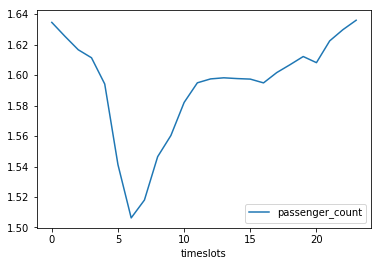

In [73]:
df.groupby('timeslots').mean().plot(kind="line")

In [46]:
###########for each borough##############

In [60]:
borough=yellow_tz_2018_06['Borough']

In [74]:
df_june_times_pass_borough=pd.concat([timeslots, passenger_count,borough], axis=1)

In [75]:
df_june_times_pass_borough

,timeslots,passenger_count,Borough
0,0,1,Queens
1,0,3,Queens
2,0,1,Queens
3,0,1,Queens
4,0,1,Queens
5,0,1,Queens
6,0,1,Queens
7,0,1,Queens
8,0,1,Queens
9,0,1,Queens


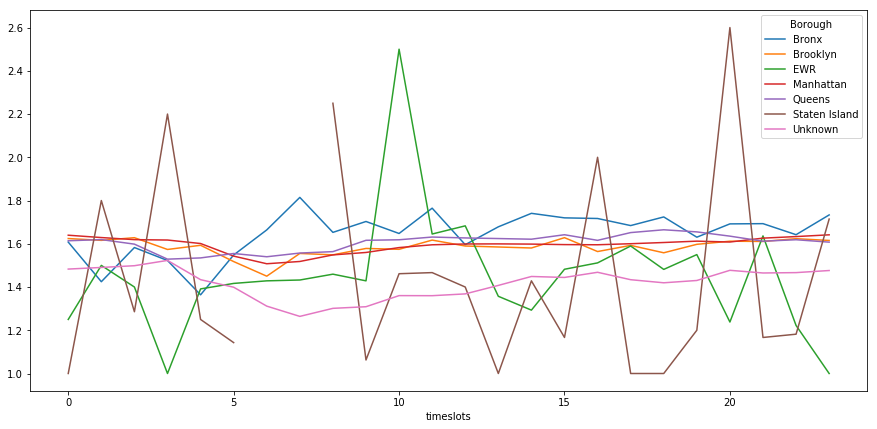

In [98]:
fig, ax = plt.subplots(figsize=(15,7))
#the line commented below don't work, I wanted to add more time slots 
#PassengerMeans, TimeSlots = ax.get_legend_handles_labels()
#ax.legend(PassengerMeans, TimeSlots)
df_june_times_pass_borough.groupby(['timeslots','Borough'])['passenger_count'].mean().unstack().plot(ax=ax)